In [1]:
#1 dimensional CNN for predicting optimal crops based on soil data (N, P, K, temperature, humidity, ph, rainfall)

#model implemented based on this example
#https://www.analyticsvidhya.com/blog/2021/07/convolution-neural-network-the-base-for-many-deep-learning-algorithms-cnn-illustrated-by-1-d-ecg-signal-physionet/

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
#import some functions for splitting data and constructing CNN model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [2]:
#load data from input folder
data = pd.read_csv('input/Crop_recommendation.csv')
num_of_data = len(data)

print("Original data: \n", data.head())

#convert label strings to numbers (rice=0, maize=1, chickpea=2...)
for row in range(num_of_data):
    if data.at[row, 'label'] == 'rice':
        data.at[row, 'label'] = 0
    elif data.at[row, 'label'] == 'maize':
        data.at[row, 'label'] = 1
    elif data.at[row, 'label'] == 'chickpea':
        data.at[row, 'label'] = 2
    elif data.at[row, 'label'] == 'kidneybeans':
        data.at[row, 'label'] = 3
    elif data.at[row, 'label'] == 'pigeonpeas':
        data.at[row, 'label'] = 4
    elif data.at[row, 'label'] == 'mothbeans':
        data.at[row, 'label'] = 5
    elif data.at[row, 'label'] == 'mungbean':
        data.at[row, 'label'] = 6
    elif data.at[row, 'label'] == 'blackgram':
        data.at[row, 'label'] = 7
    elif data.at[row, 'label'] == 'lentil':
        data.at[row, 'label'] = 8
    elif data.at[row, 'label'] == 'pomegranate':
        data.at[row, 'label'] = 9
    elif data.at[row, 'label'] == 'banana':
        data.at[row, 'label'] = 10
    elif data.at[row, 'label'] == 'mango':
        data.at[row, 'label'] = 11
    elif data.at[row, 'label'] == 'grapes':
        data.at[row, 'label'] = 12
    elif data.at[row, 'label'] == 'watermelon':
        data.at[row, 'label'] = 13
    elif data.at[row, 'label'] == 'muskmelon':
        data.at[row, 'label'] = 14
    elif data.at[row, 'label'] == 'apple':
        data.at[row, 'label'] = 15
    elif data.at[row, 'label'] == 'orange':
        data.at[row, 'label'] = 16
    elif data.at[row, 'label'] == 'papaya':
        data.at[row, 'label'] = 17
    elif data.at[row, 'label'] == 'coconut':
        data.at[row, 'label'] = 18
    elif data.at[row, 'label'] == 'cotton':
        data.at[row, 'label'] = 19
    elif data.at[row, 'label'] == 'jute':
        data.at[row, 'label'] = 20
    elif data.at[row, 'label'] == 'coffee':
        data.at[row, 'label'] = 21
        
print("Data after modifying labels: \n", data.head())

Original data: 
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Data after modifying labels: 
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     0
1  85  58  41    21.770462  80.319644  7.038096  226.655537     0
2  60  55  44    23.004459  82.320763  7.840207  263.964248     0
3  74  35  40    26.491096  80.158363  6.980401  242.864034     0
4  78  42  42    20.130175  81.604873  7.628473  262.717340     0


In [3]:
#initialize parameters
train_test_ratio = 0.3
lr = 0.01

#get random indexes for dividing test and train data
randomlist = random.sample(range(0, num_of_data), int(train_test_ratio*num_of_data))

#initialize dataframes for test and training data
df_train = pd.DataFrame({'N': [],
                         'P': [],
                         'K': [],
                         'temperature': [],
                         'humidity': [],
                         'ph': [],
                         'rainfall': [],
                         'label': []
                        })
df_test = pd.DataFrame({'N': [],
                         'P': [],
                         'K': [],
                         'temperature': [],
                         'humidity': [],
                         'ph': [],
                         'rainfall': [],
                         'label': []
                        })

#loop through the data and split it into train and test data
i = 0
for value in data.values:
    #save to test data
    if i in randomlist:
        df_test.loc[len(df_test.index)] = value
    #save to train data
    else:
        df_train.loc[len(df_train.index)] = value  
    i += 1

#save temporary train and test datasets to input folder
df_train.to_csv('input/train.csv', index=False)
df_test.to_csv('input/test.csv', index=False)

print("df_test shape: ", df_test.shape)
print("df_train shape: ", df_train.shape)
print(df_test.head())
print(df_train.head())

df_test shape:  (660, 8)
df_train shape:  (1540, 8)
      N     P     K  temperature   humidity        ph    rainfall  label
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536    0.0
1  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340    0.0
2  69.0  55.0  38.0    22.708838  82.639414  5.700806  271.324860    0.0
3  94.0  53.0  40.0    20.277744  82.894086  5.718627  241.974195    0.0
4  91.0  53.0  40.0    26.527235  81.417538  5.386168  264.614870    0.0
      N     P     K  temperature   humidity        ph    rainfall  label
0  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537    0.0
1  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248    0.0
2  74.0  35.0  40.0    26.491096  80.158363  6.980401  242.864034    0.0
3  69.0  37.0  42.0    23.058049  83.370118  7.073454  251.055000    0.0
4  89.0  54.0  38.0    24.515881  83.535216  6.685346  230.446236    0.0


In [4]:
#change column names to numbers
for trains in df_train:
    df_train.columns = list(range(len(df_train.columns))) 
for tests in df_test:
    df_test.columns = list(range(len(df_test.columns)))
    
print(df_train.head())
print(df_test.head())

      0     1     2          3          4         5           6    7
0  85.0  58.0  41.0  21.770462  80.319644  7.038096  226.655537  0.0
1  60.0  55.0  44.0  23.004459  82.320763  7.840207  263.964248  0.0
2  74.0  35.0  40.0  26.491096  80.158363  6.980401  242.864034  0.0
3  69.0  37.0  42.0  23.058049  83.370118  7.073454  251.055000  0.0
4  89.0  54.0  38.0  24.515881  83.535216  6.685346  230.446236  0.0
      0     1     2          3          4         5           6    7
0  90.0  42.0  43.0  20.879744  82.002744  6.502985  202.935536  0.0
1  78.0  42.0  42.0  20.130175  81.604873  7.628473  262.717340  0.0
2  69.0  55.0  38.0  22.708838  82.639414  5.700806  271.324860  0.0
3  94.0  53.0  40.0  20.277744  82.894086  5.718627  241.974195  0.0
4  91.0  53.0  40.0  26.527235  81.417538  5.386168  264.614870  0.0


In [5]:
#combine test and train datasets, suffle combined dataset and reset indexes
dataset = pd.concat([df_train, df_test], axis=0).sample(frac=1.0, random_state =0).reset_index(drop=True)
#display combined dataset
print("Shape of final dataset", dataset.shape)
print(dataset.info())
print(dataset.head())

Shape of final dataset (2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2200 non-null   float64
 1   1       2200 non-null   float64
 2   2       2200 non-null   float64
 3   3       2200 non-null   float64
 4   4       2200 non-null   float64
 5   5       2200 non-null   float64
 6   6       2200 non-null   float64
 7   7       2200 non-null   float64
dtypes: float64(8)
memory usage: 137.6 KB
None
       0     1     2          3          4         5           6     7
0    3.0   9.0  35.0  26.916419  99.846716  6.318553  225.632366  18.0
1  103.0  51.0  20.0  22.802131  84.146684  7.046607   91.638957  19.0
2    0.0  29.0  32.0  28.059124  98.367098  5.868256  171.651640  18.0
3    5.0  74.0  21.0  16.244692  21.357939  5.591704   66.970533   3.0
4   86.0  79.0  45.0  27.812515  82.692854  5.807664   99.209615  10.0


In [6]:
#splitting dataset to features and labels
X = dataset.iloc[:,:-1].values #independent values / features (N, P, K, temperature, humidity, ph, rainfall)
y = dataset.iloc[:,-1].values #dependent values / label (rice=0, maize=1, chickpea=2...)

#splitting the datasets for training and testing process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = train_test_ratio)

#display current shapes
print('size of X_train:', X_train.shape)
print('size of X_test:', X_test.shape)
print('size of y_train:', y_train.shape)
print('size of y_test:', y_test.shape)

size of X_train: (1540, 7)
size of X_test: (660, 7)
size of y_train: (1540,)
size of y_test: (660,)


In [7]:
#Reshape train and test data to (n_samples, 7, 1), where each sample is of size (7, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

X Train shape:  (1540, 7, 1)
X Test shape:  (660, 7, 1)


In [8]:
# Create sequential model 
cnn_model = tf.keras.models.Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=lr), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=lr)))
#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=lr)))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
#Flatten the output
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 22, activation='softmax'))

In [9]:
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 64)             6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 7, 128)            24704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 128)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 128)            0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                        

In [10]:
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=100, batch_size = 25, validation_data = (X_test, y_test))

Epoch 1/100
62/62 [==============================] - 1s 7ms/step - loss: 2.2367 - accuracy: 0.3552 - val_loss: 0.6789 - val_accuracy: 0.7242
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7585 - accuracy: 0.7370 - val_loss: 0.3307 - val_accuracy: 0.8773
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8455 - val_loss: 0.2844 - val_accuracy: 0.8955
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8701 - val_loss: 0.2676 - val_accuracy: 0.8818
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.8747 - val_loss: 0.1618 - val_accuracy: 0.9318
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.2283 - accuracy: 0.9221 - val_loss: 0.1929 - val_accuracy: 0.9288
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.2731 - accuracy: 0.9045 - val_loss: 0.3392 - val_accuracy: 0.8485
Epoch 8/100
6

Epoch 59/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.9649 - val_loss: 0.1702 - val_accuracy: 0.9561
Epoch 60/100
62/62 [==============================] - 0s 3ms/step - loss: 0.1340 - accuracy: 0.9494 - val_loss: 0.1023 - val_accuracy: 0.9606
Epoch 61/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.9656 - val_loss: 0.1131 - val_accuracy: 0.9667
Epoch 62/100
62/62 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9636 - val_loss: 0.1514 - val_accuracy: 0.9530
Epoch 63/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9578 - val_loss: 0.0918 - val_accuracy: 0.9561
Epoch 64/100
62/62 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.9597 - val_loss: 0.0996 - val_accuracy: 0.9636
Epoch 65/100
62/62 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9571 - val_loss: 0.1075 - val_accuracy: 0.9561
Epoch 

Text(0, 0.5, 'Accuracy')

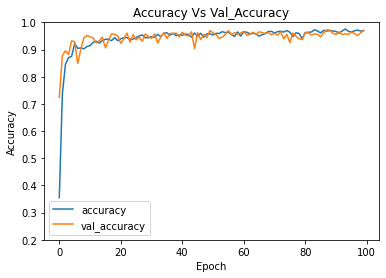

In [11]:
#display accuracy
plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.ylim(0.2, 1)
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

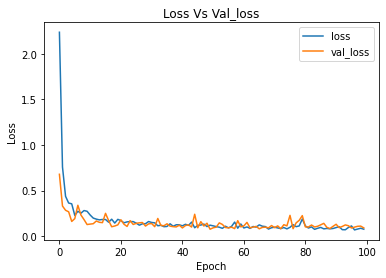

In [12]:
#display loss
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')